<a href="https://colab.research.google.com/github/efh32/TensorFlow-practice/blob/master/2_layer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow.keras as k
import tensorflow.keras.layers as kl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [3]:
data, labels = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

In [5]:
model = k.Sequential()
model.add(kl.Dense(2, input_shape=(2,), activation='sigmoid', bias_initializer='he_normal', name='layer1'))
model.add(kl.Dense(1, activation='sigmoid', bias_initializer='he_normal', name='layer2'))

In [7]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')
history1 = model.fit(X_train, y_train, batch_size=32, epochs=1000, verbose=0)

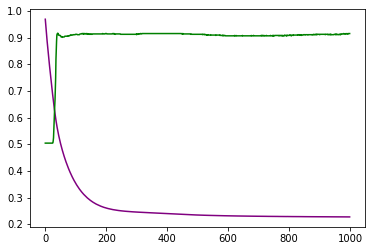

In [8]:
plt.plot(history1.history['loss'], c='purple')
plt.plot(history1.history['accuracy'], c='green')

In [9]:
layer1 = model.get_layer('layer1')
weights1 = layer1.get_weights()

print(weights1)

[array([[ 0.7102589, -1.3744003],
       [-2.8295076, -3.803879 ]], dtype=float32), array([-1.683358  ,  0.44784558], dtype=float32)]


In [10]:
x1, x2 = -4, 4

def func1(x):
  return (-1)*(0.7102589*x - 1.683358)/(-2.8295076)

def func2(x):
  return (-1)*(-1.3744003*x + 0.44784558)/(-3.803879)

x3 = func1(x1)
x4 = func1(x2)

x5 = func2(x1)
x6 = func2(x2)

In [11]:
c1_train = X_train[y_train == 0]
c2_train = X_train[y_train == 1]

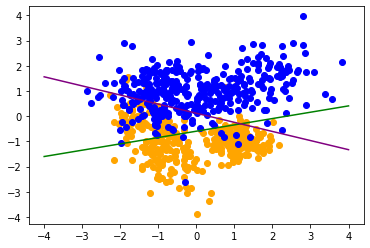

In [12]:
plt.scatter(c1_train[:,0], c1_train[:,1], c='orange')
plt.scatter(c2_train[:,0], c2_train[:,1], c='b')
plt.plot([x1,x2], [x3,x4], c='g')
plt.plot([x1,x2], [x5,x6], c='purple')

In [14]:
model_layer1 = k.models.Model(inputs=model.input, outputs = model.get_layer('layer1').output)





In [15]:
layer1_predict_train = model_layer1.predict(X_train)
layer1_predict_test = model_layer1.predict(X_test)

In [16]:
c1_l1_train = layer1_predict_train[y_train == 0]
c2_l1_train = layer1_predict_train[y_train == 1]

c1_l1_test = layer1_predict_test[y_test == 0]
c2_l1_test = layer1_predict_test[y_test == 1]

In [17]:
layer2 = model.get_layer('layer2')
weights2 = layer2.get_weights()

print(weights2)

[array([[-4.6051264],
       [-3.7750268]], dtype=float32), array([3.7670326], dtype=float32)]


In [22]:
x1, x2 = 0, 1

def func3(x):
  return (-1)*(-4.6051264*x + 3.7670326)/(-3.7750268)

x3 = func3(x1)
x4 = func3(x2)

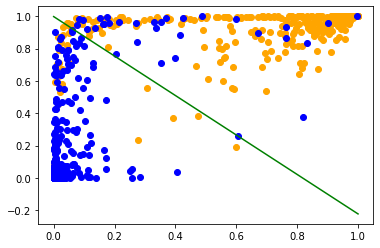

In [23]:
plt.close()
plt.scatter(c1_l1_train[:,0], c1_l1_train[:,1], c='orange')
plt.scatter(c2_l1_train[:,0], c2_l1_train[:,1], c='b')
plt.plot([x1, x2], [x3, x4], c='g')

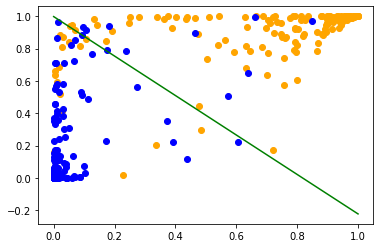

In [24]:
plt.close()
plt.scatter(c1_l1_test[:,0], c1_l1_test[:,1], c='orange')
plt.scatter(c2_l1_test[:,0], c2_l1_test[:,1], c='b')
plt.plot([x1, x2], [x3, x4], c='g')